In [434]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [435]:

df = pd.read_csv('data_features.csv', encoding = "ISO-8859-1", dtype='unicode')


In [436]:
df.head()

,Unnamed: 0,match_id,Pt,Set1,Set2,Gm1,Gm2,Pts,Gm#,TbSet,...,P2_hand,Date,serve_pieces,first_serve,serve_faults,serve_direction,shot_depth,shot_type,shot_direction,court_position
0,0,20220114-M-Adelaide-SF-Marin_Cilic-Thanasi_Kok...,1,0,0,0,0,0-0,1 (1),1,...,R,2022/01/14,NaN,True,Unknown,Unknown,Unknown,NaN,Unknown,Unknown
1,1,20220114-M-Adelaide-SF-Marin_Cilic-Thanasi_Kok...,2,0,0,0,0,0-15,1 (2),1,...,R,2022/01/14,NaN,True,Unknown,Unknown,Unknown,NaN,Unknown,Unknown
2,2,20220114-M-Adelaide-SF-Marin_Cilic-Thanasi_Kok...,3,0,0,0,0,15-15,1 (3),1,...,R,2022/01/14,6,True,Unknown,down the T,Unknown,NaN,Unknown,Unknown
3,2,20220114-M-Adelaide-SF-Marin_Cilic-Thanasi_Kok...,3,0,0,0,0,15-15,1 (3),1,...,R,2022/01/14,s3,True,Unknown,Unknown,Unknown,backhand slice,to a right-handers backhand side or left-hande...,Unknown
4,2,20220114-M-Adelaide-SF-Marin_Cilic-Thanasi_Kok...,3,0,0,0,0,15-15,1 (3),1,...,R,2022/01/14,f3,True,Unknown,Unknown,Unknown,forehand groundstroke,to a right-handers backhand side or left-hande...,Unknown


In [437]:
df.shape

(2910084, 42)

In [438]:
df_rf= df[df['match_id'].str.contains("Roger_Federer")].copy()


In [485]:
print(df_rf.keys())

Index(['Unnamed: 0', 'match_id', 'Pt', 'Set1', 'Set2', 'Gm1', 'Gm2', 'Pts',
       'Gm#', 'TbSet', 'TB?', 'TBpt', 'Svr', 'Ret', 'Serving', '1st', '2nd',
       'Notes', '1stIn', '2ndIn', 'isAce', 'isUnret', 'isRallyWinner',
       'isForced', 'isUnforced', 'isDouble', 'PtWinner', 'isSvrWinner',
       'rallyCount', 'first_player', 'second_player', 'P1_hand', 'P2_hand',
       'Date', 'serve_pieces', 'first_serve', 'serve_faults',
       'serve_direction', 'shot_depth', 'shot_type', 'shot_direction',
       'court_position'],
      dtype='object')


<AxesSubplot:>

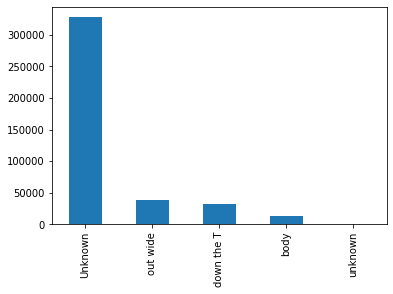

In [440]:
pd.value_counts(df_rf['serve_direction']).plot.bar()

<AxesSubplot:>

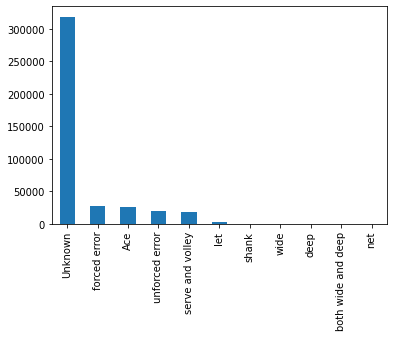

In [441]:
pd.value_counts(df_rf['serve_faults']).plot.bar()

<AxesSubplot:>

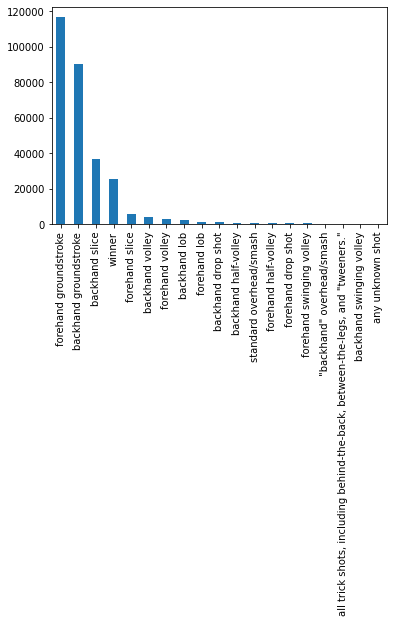

In [442]:
pd.value_counts(df_rf['shot_type']).plot.bar()

<AxesSubplot:>

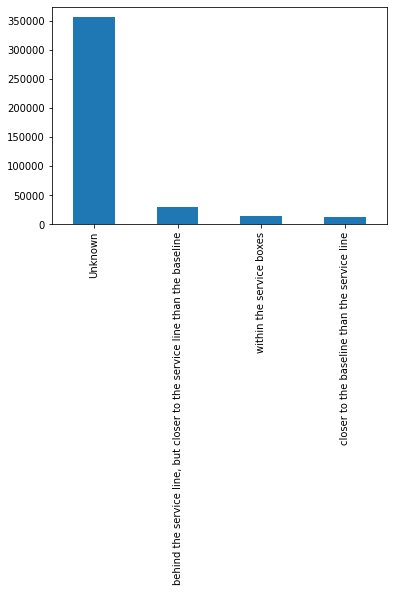

In [443]:
pd.value_counts(df_rf['shot_depth']).plot.bar()

<AxesSubplot:>

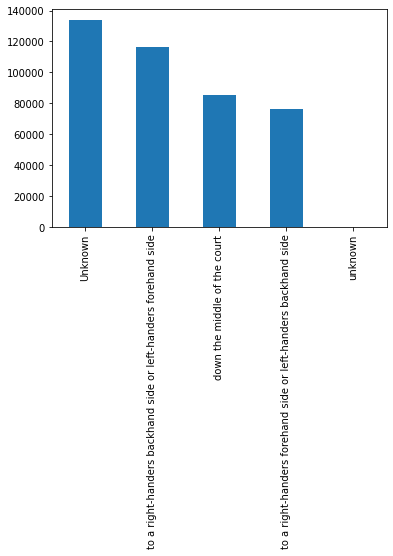

In [444]:
pd.value_counts(df_rf['shot_direction']).plot.bar()

In [445]:
df_rf_first_player = df[df['first_player'].str.contains("Roger Federer")].copy()
        

<AxesSubplot:>

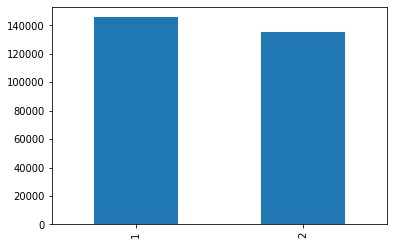

In [446]:
pd.value_counts(df_rf_first_player['PtWinner']).plot.bar()

<AxesSubplot:>

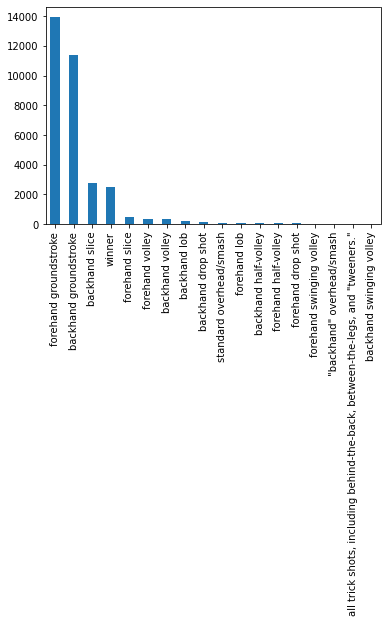

In [447]:
shot_type_codes, shot_type_uniques = pd.factorize(['forehand groundstroke','backhand groundstroke',
                                                   'forehand slice','backhand slice','forehand volley',
                                                   'backhand volley','standard overhead/smash',
                                                   '"backhand" overhead/smash','forehand drop shot',
                                                   'backhand drop shot','forehand lob','backhand lob',
                                                   'forehand half-volley','backhand half-volley',
                                                   'forehand swinging volley','backhand swinging volley',
                                                   'all trick shots, including behind-the-back, between-the-legs, and "tweeners."',
                                                   'any unknown shot','winner'])
P2_hand_codes, P2_hand_uniques = pd.factorize(['R', 'L'])
serve_direction_codes, serve_direction_uniques = pd.factorize(['out wide','body','down the T','unknown'])
df_rf_first_player_L = df_rf_first_player[df_rf_first_player['P2_hand'].str.contains('L')]
df_rf_first_player_R = df_rf_first_player[df_rf_first_player['P2_hand'].str.contains('R')]
pd.value_counts(df_rf_first_player_L['shot_type']).plot.bar()


<AxesSubplot:>

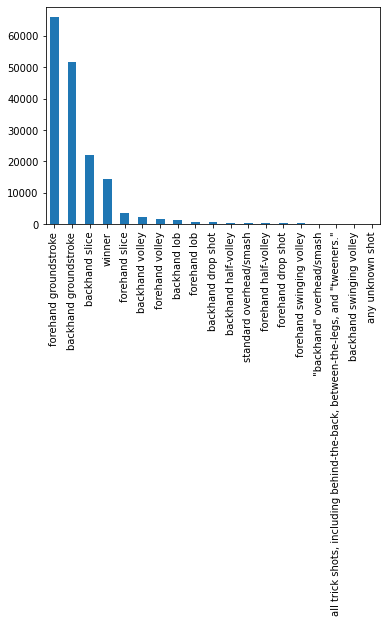

In [448]:
pd.value_counts(df_rf_first_player_R['shot_type']).plot.bar()

<AxesSubplot:>

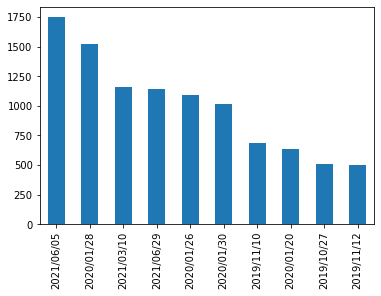

In [454]:
df3 = df_rf_first_player.head(10000)
pd.value_counts(df3['Date']).plot.bar()

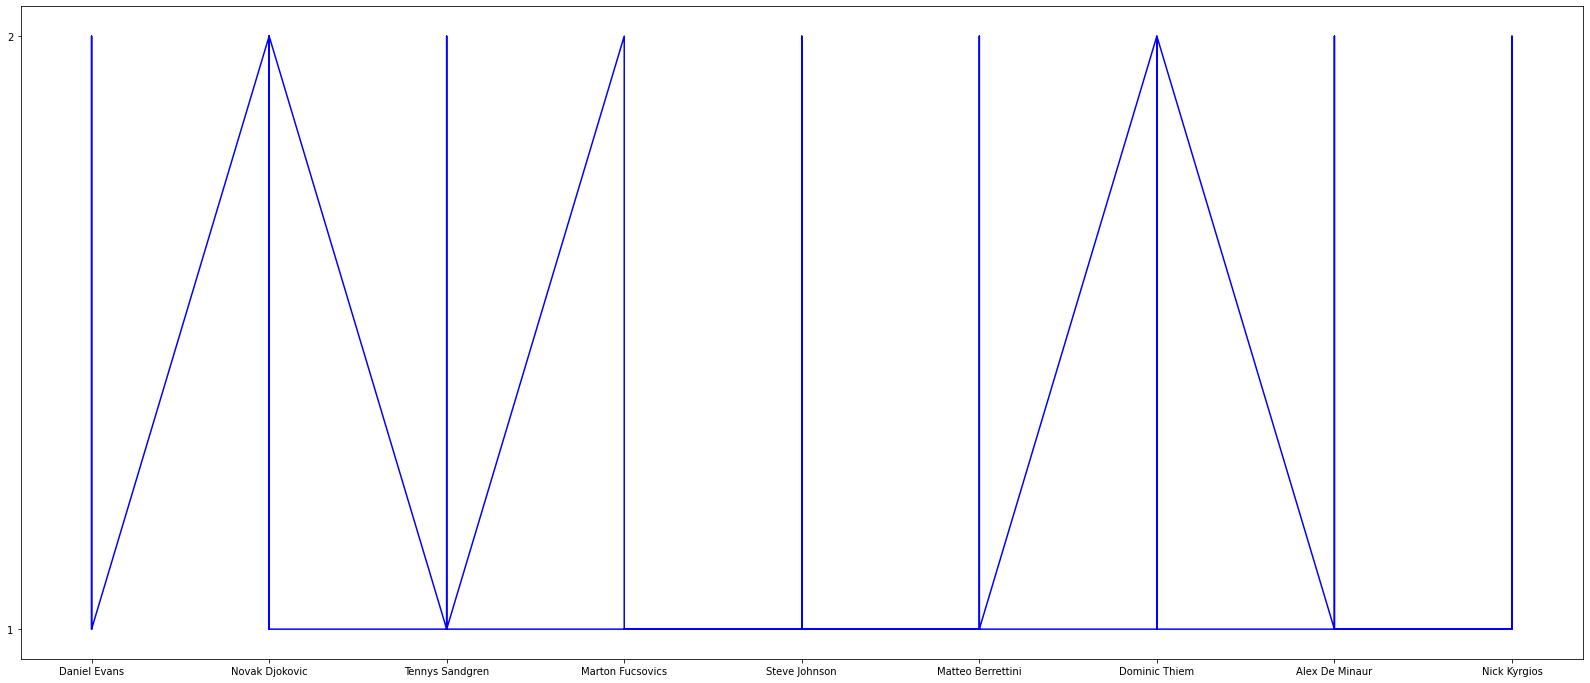

In [465]:
plt.figure(figsize=(28, 12))
plt.plot(df_rf_first_player_R[:10000].loc[:, 'second_player'], df_rf_first_player_R[:10000].loc[:, 'PtWinner'], color="blue", label="Point won againt right hand players")

In [479]:
abc = pd.factorize(df_new['shot_type'])
print(abc[0]+1)

[0 1 1 ... 3 0 2]


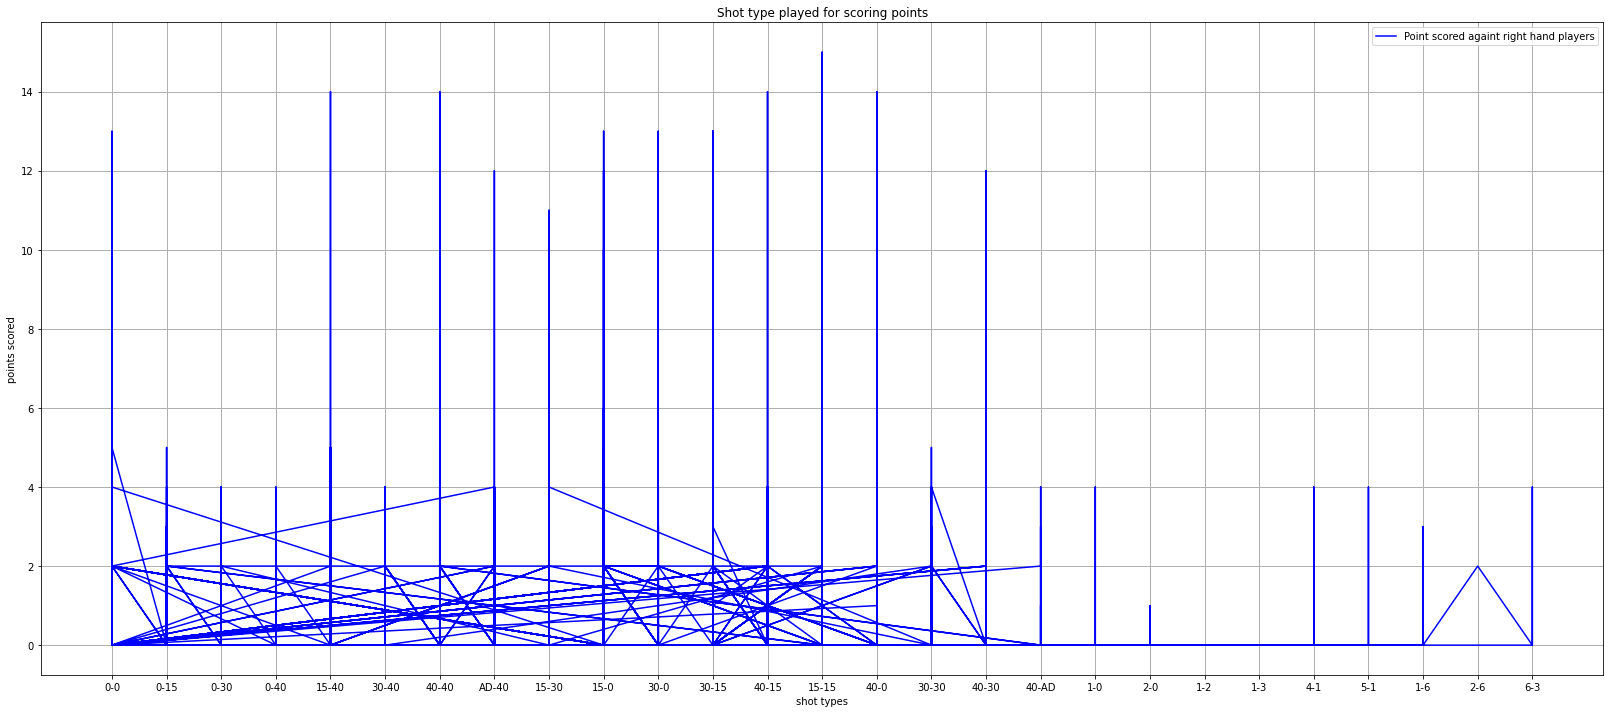

In [486]:
one_match_id = df_rf_first_player.iloc[0]['match_id']
df_new = df[df['match_id'] == one_match_id]
plt.figure(figsize=(28, 12))
shot_type_binary = pd.factorize(df_new[:10000].loc[:, 'shot_type'])
shot_type_binary
plt.plot(pd.Series(df_new[:10000].loc[:, 'Pts']),shot_type_binary[0]+1,  color="blue", label="Point scored againt right hand players")
plt.grid(linewidth=1)
plt.title("Shot type played for scoring points")
plt.xlabel("shot types")
plt.ylabel("points scored")
plt.legend()

In [ ]:
#how many matches won over the year against who

In [ ]:
sns.heatmap(df_rf_first_player.corr(), annot=True, fmt=".2f")
plt.show()

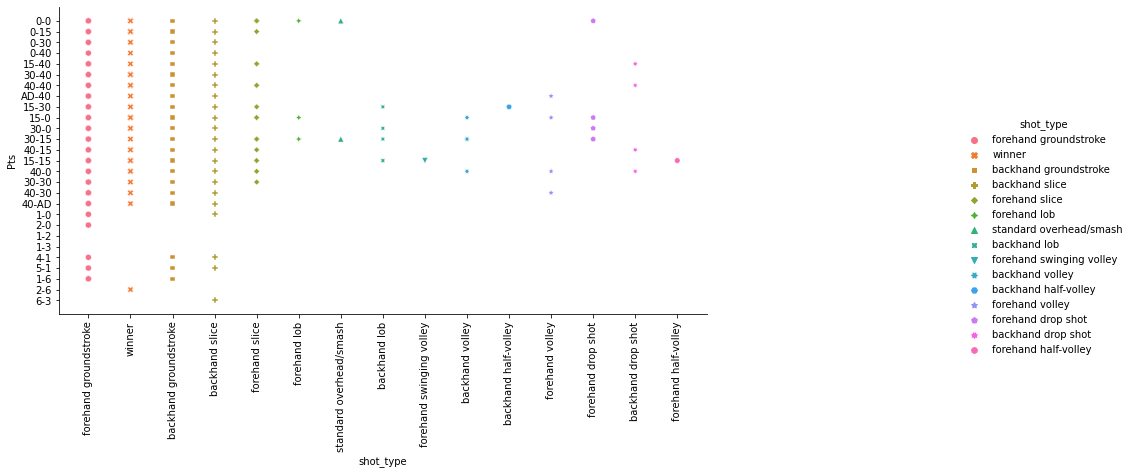

In [507]:

g = sns.relplot(x="shot_type", y="Pts", hue="shot_type", style="shot_type",
            data=df_new[:10000]);
g.set_xticklabels(rotation=90)
g.fig.set_figwidth(18)


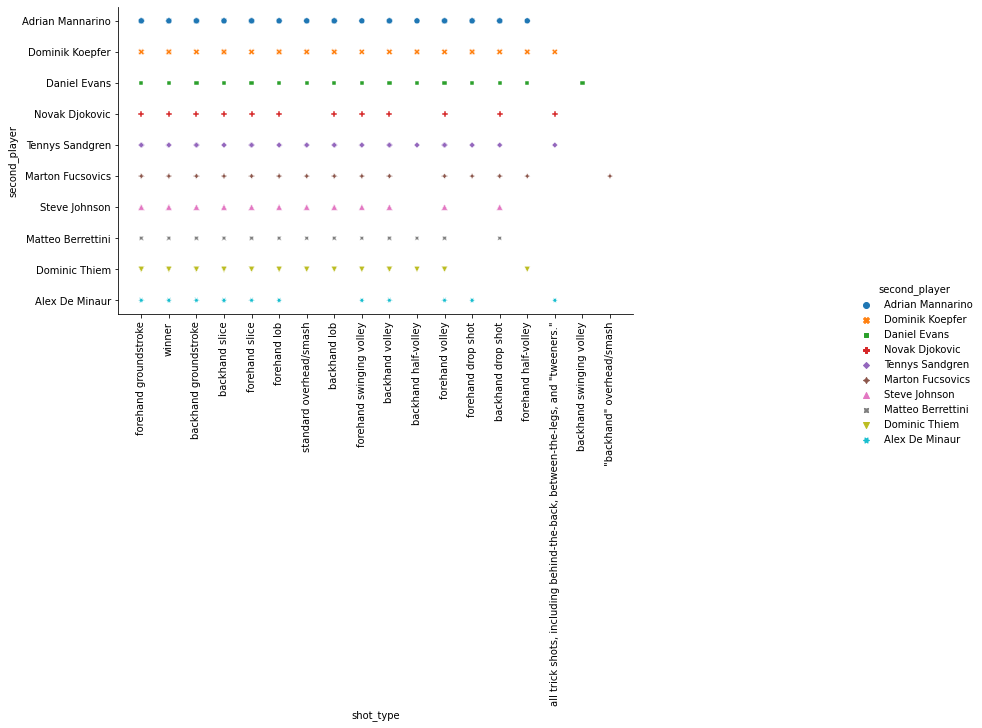

In [510]:
g = sns.relplot(x="shot_type", y="second_player", hue="second_player", style="second_player",
            data=df_rf_first_player[:10000]);
g.set_xticklabels(rotation=90)
g.fig.set_figwidth(18)

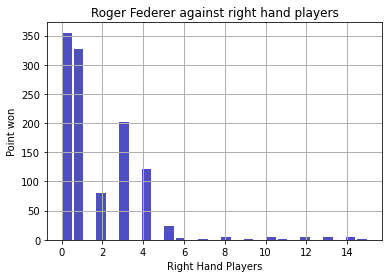

In [490]:
n, bins, patches = plt.hist(x=shot_type_binary[0]+1, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(linewidth=1)
plt.xlabel('Right Hand Players')
plt.ylabel('Point won')
plt.title('Roger Federer against right hand players')
plt.show()


In [324]:
rallyCount = list(df_rf['rallyCount'])
prevRalleyCount = []
matchId = 0 
for i, match_id in enumerate(matchIdList):
    j = i - 1
    if match_id == matchId:
        prevRalleyCount.append(rallyCount[j])
    else:
        prevRalleyCount.append(0)
    matchId = Id

#df_rf.insert(len(df_rf.columns), 'prev_rallyCount', prevRalleyCount)
df_rf['prev_rallyCount'] = prevRalleyCount

In [325]:
df_rf_serve = df_rf[df_rf['Serving'].str.contains("RF")].copy()
deuceScores = ['0-0', '15-15', '30-0', '0-30', '40-15', '15-40', '40-40']
pts = list(df_rf_serve["Pts"])
isDueceCourt = []
for pt in pts:    
    if pt in deuceScores:
        isDueceCourt.append(1)
    else:
        isDueceCourt.append(0)

#df_rf_serve.insert(len(df_rf.columns), 'is_duece_court', isDueceCourt)
df_rf_serve["is_duece_court"] = isDueceCourt

In [326]:
gm_rf = []
gm_opp = []
for index, row in df_rf_serve.iterrows():
    if row['first_player'] == 'Roger_Federer':
        gm_rf.append(row['Gm1'])
        gm_opp.append(row['Gm2'])
    else:
        gm_rf.append(row['Gm2'])
        gm_opp.append(row['Gm1'])
        
#df_rf_serve.insert(len(df_rf_serve.columns), 'gm_rf', gm_rf)
#df_rf_serve.insert(len(df_rf_serve.columns), 'gm_opp', gm_opp)
df_rf_serve['gm_rf'] = gm_rf
df_rf_serve['gm_opp'] = gm_opp

In [327]:
set_rf = []
set_opp = []
for index, row in df_rf_serve.iterrows():
    if row['first_player'] == 'Roger_Federer':
        set_rf.append(row['Set1'])
        set_opp.append(row['Set2'])
    else:
        set_rf.append(row['Set2'])
        set_opp.append(row['Set1'])

#df_rf_serve.insert(len(df_rf_serve.columns), 'set_rf', set_rf, allow_duplicates=True)
#df_rf_serve.insert(len(df_rf_serve.columns), 'set_opp', set_opp, allow_duplicates=True)
df_rf_serve['set_rf'] = set_rf
df_rf_serve['set_opp'] = set_opp

In [328]:
df_pts = df_rf_serve['Pts'].str.split("-")
pts_rf = []

for pt in df_pts:
    pt_rf = pt[0]
    if pt_rf == "AD":
        pts_rf.append("50")
    else:
        pts_rf.append(pt_rf)

#df_rf_serve.insert(len(df_rf_serve.columns), 'pts_rf', pts_rf)
df_rf_serve['pts_rf'] = pts_rf

pts_opp = []

for pt in df_pts:
    pt_opp = pt[1]
    if pt_opp == "AD":
        pts_opp.append("50")
    else:
        pts_opp.append(pt_opp)
        
#df_rf_serve.insert(len(df_rf_serve.columns), 'pts_opp', pts_opp)
df_rf_serve['pts_opp'] = pts_opp 

In [332]:
df_features = df_rf_serve[['set_rf', 'set_opp', 'gm_rf', 'gm_opp','pts_rf', 'pts_opp', 'prev_rallyCount', 'PtWinner', 'is_duece_court', 'serve_faults', 'serve_direction',
       'shot_depth', 'shot_type', 'shot_direction', 'court_position']]

In [336]:
print(df_features.head(5))

       set_rf set_opp gm_rf gm_opp pts_rf pts_opp  prev_rallyCount PtWinner  \
106190      0       0     0      1      0       0                0        2   
106191      0       0     0      1      0       0                0        2   
106192      0       0     0      1      0       0                0        2   
106193      0       0     0      1     15       0                0        2   
106194      0       0     0      1     15       0                0        2   

        is_duece_court      serve_faults serve_direction shot_depth  \
106190               1  serve and volley        out wide    Unknown   
106191               1           Unknown         Unknown    Unknown   
106192               1      forced error         Unknown    Unknown   
106193               0  serve and volley        out wide    Unknown   
106194               0      forced error         Unknown    Unknown   

                    shot_type  \
106190                    NaN   
106191         forehand slice   

<AxesSubplot:>

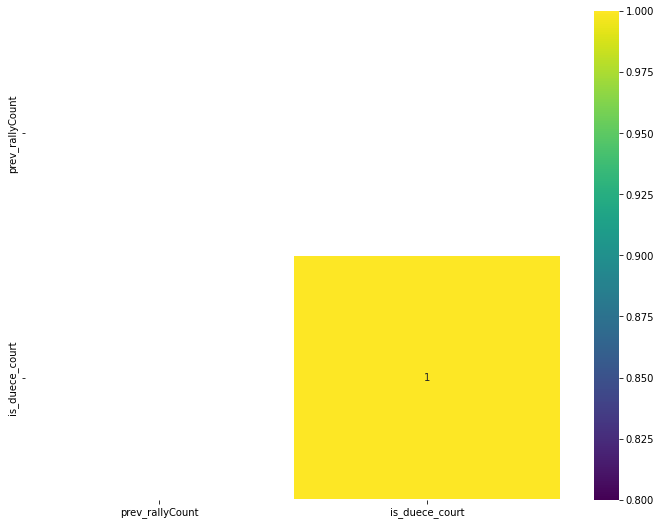

In [335]:
cormat = df_features.corr()

f, ax = plt.subplots(figsize=(12, 9))

colormap = plt.cm.viridis
sns.heatmap(cormat, linewidths=0.1, cmap = colormap, 
            linecolor = 'White', vmax=0.8, annot=True)